Buy this book at Amazon.com

    Chapter 12  Tuples

This chapter presents one more built-in type, the tuple, and then shows how lists, dictionaries, and tuples work together. I also present a useful feature for variable-length argument lists, the gather and scatter operators.

One note: there is no consensus on how to pronounce “tuple”. Some people say “tuh-ple”, which rhymes with “supple”. But in the context of programming, most people say “too-ple”, which rhymes with “quadruple”.

    12.1  Tuples are immutable

A tuple is a sequence of values. The values can be any type, and they are indexed by integers, so in that respect tuples are a lot like lists. 

            The important difference is that tuples are immutable.

Syntactically, a tuple is a comma-separated list of values:

In [62]:
t = 'a', 'b', 'c', 'd', 'e'
t

('a', 'b', 'c', 'd', 'e')

Although it is not necessary, it is common to enclose tuples in parentheses:

In [63]:
t = ('a', 'b', 'c', 'd', 'e')
t

('a', 'b', 'c', 'd', 'e')

To create a tuple with a single element, you have to include a final comma:

In [64]:
t1 = 'a',
type(t1)

tuple

A value in parentheses is not a tuple:

In [65]:
t2 = ('a')
type(t2)

str

<class 'str'>
Another way to create a tuple is the built-in function tuple. With no argument, it creates an empty tuple:

In [66]:
t = tuple()
t

()

()
If the argument is a sequence (string, list or tuple), 

        the result is a tuple with the elements of the sequence:

In [67]:
t = tuple('lupins')
t

('l', 'u', 'p', 'i', 'n', 's')

('l', 'u', 'p', 'i', 'n', 's')
Because tuple is the name of a built-in function, you should avoid using it as a variable name.

Most list operators also work on tuples. The bracket operator indexes an element:

In [68]:
t = ('a', 'b', 'c', 'd', 'e')
t[0]

'a'

'a'
And the slice operator selects a range of elements.

In [69]:
t[1:3]

('b', 'c')

('b', 'c')
But if you try to modify one of the elements of the tuple, you get an error:

In [70]:
t[0] = 'A'

TypeError: 'tuple' object does not support item assignment

TypeError: object doesn't support item assignment
Because tuples are immutable, you can’t modify the elements. But you can replace one tuple with another:

In [ ]:
t = ('A',) + t[1:]
t

('A', 'b', 'c', 'd', 'e')
This statement makes a new tuple and then makes t refer to it.

The relational operators work with tuples and other sequences; Python starts by comparing the first element from each sequence. If they are equal, it goes on to the next elements, and so on, until it finds elements that differ. Subsequent elements are not considered (even if they are really big).

In [ ]:
(0, 1, 2) < (0, 3, 4)

In [ ]:
(0, 1, 2000000) < (0, 3, 4)

    12.2  Tuple assignment

It is often useful to swap the values of two variables. With conventional assignments, you have to use a temporary variable. For example, to swap a and b:

In [ ]:
a=tuple('jim')
b=tuple('james')
temp = a
a = b
b= temp
print(a)
print(b)

This solution is cumbersome; tuple assignment is more elegant:

In [ ]:
print(a,'=a               ',b,'=b   ')
a, b = b, a
print(a,'=a               ',b,'=b  ')

The left side is a tuple of variables; the right side is a tuple of expressions. Each value is assigned to its respective variable. All the expressions on the right side are evaluated before any of the assignments.

The number of variables on the left and the number of values on the right have to be the same:

In [ ]:
a, b = 1, 2, 3

More generally, the right side can be any kind of sequence (string, list or tuple). For example, to split an email address into a user name and a domain, you could write:

In [ ]:
addr = 'monty@python.org'
uname, domain = addr.split('@')
print(uname)
print(domain)

The return value from split is a list with two elements; 
    
    the first element is assigned to uname, 
    the second to domain.


Strictly speaking, a function can only return one value, but if the value is a tuple, the effect is the same as returning multiple values. For example, if you want to divide two integers and compute the quotient and remainder, it is inefficient to compute x//y and then x%y. It is better to compute them both at the same time.

The built-in function divmod takes two arguments and returns a tuple of two values, the quotient and remainder. You can store the result as a tuple:

In [ ]:
t = divmod(7, 3)
t

Or use tuple assignment to store the elements separately:

In [ ]:
quot, rem = divmod(7, 3)
print(quot, rem)

Here is an example of a function that returns a tuple:

In [ ]:
t = divmod(7, 3)
def min_max(t):
    return min(t), max(t)
min_max(t)

max and min are built-in functions that find the largest and smallest elements of a sequence. min_max computes both and returns a tuple of two values.

    12.4  Variable-length argument tuples

Functions can take a variable number of arguments. A parameter name that begins with * gathers arguments into a tuple. For example, printall takes any number of arguments and prints them:

In [ ]:
def printall(*args):
    print(args)

The gather parameter can have any name you like, but args is conventional. Here’s how the function works:

In [ ]:
printall(1, 2.0, '3')

The complement of gather is scatter. If you have a sequence of values and you want to pass it to a function as multiple arguments, you can use the * operator. For example, divmod takes exactly two arguments; it doesn’t work with a tuple:

In [ ]:
t = (7, 3)
divmod(t)

TypeError: divmod expected 2 arguments, got 1
But if you scatter the tuple, it works:

In [ ]:
divmod(*t)

(2, 1)
Many of the built-in functions use variable-length argument tuples. For example, max and min can take any number of arguments:

In [ ]:
max(1, 2, 3)

3
But sum does not.

In [ ]:
sum(1, 2, 3)

TypeError: sum expected at most 2 arguments, got 3
As an exercise, write a function called sum_all that takes any number of arguments and returns their sum.

    12.5  Lists and tuples

zip is a built-in function that takes two or more sequences and interleaves them. The name of the function refers to a zipper, which interleaves two rows of teeth.

This example zips a string and a list:

In [ ]:
s = 'abc'
t = [0, 1, 2]
zip(s, t)

<zip object at 0x7f7d0a9e7c48>
The result is a zip object that knows how to iterate through the pairs. The most common use of zip is in a for loop:

In [ ]:
 for pair in zip(s, t):
     print(pair)


('a', 0)
('b', 1)
('c', 2)
A zip object is a kind of iterator, which is any object that iterates through a sequence. Iterators are similar to lists in some ways, but unlike lists, you can’t use an index to select an element from an iterator.

If you want to use list operators and methods, you can use a zip object to make a list:

In [ ]:
list(zip(s, t))

[('a', 0), ('b', 1), ('c', 2)]
The result is a list of tuples; in this example, each tuple contains a character from the string and the corresponding element from the list.

If the sequences are not the same length, the result has the length of the shorter one.

In [ ]:
list(zip('Anne', 'Elk'))

[('A', 'E'), ('n', 'l'), ('n', 'k')]

You can use tuple assignment in a for loop to traverse a list of tuples:

In [ ]:
t = [('a', 0), ('b', 1), ('c', 2)]
for letter, number in t:
    print(number, letter)

Each time through the loop, Python selects the next tuple in the list and assigns the elements to letter and number. The output of this loop is:

0 a
1 b
2 c

If you combine zip, for and tuple assignment, you get a useful idiom for traversing two (or more) sequences at the same time. For example, has_match takes two sequences, t1 and t2, and returns True if there is an index i such that t1[i] == t2[i]:

In [ ]:
def has_match(t1, t2):
    for x, y in zip(t1, t2):
        if x == y:
            return True
    return False

If you need to traverse the elements of a sequence and their indices, you can use the built-in function enumerate:

In [ ]:
for index, element in enumerate('abc'):
    print(index, element)

The result from enumerate is an enumerate object, which iterates a sequence of pairs; each pair contains an index (starting from 0) and an element from the given sequence. In this example, the output is

0 a
1 b
2 c
Again.

    12.6  Dictionaries and tuples

Dictionaries have a method called items that returns a sequence of tuples, where each tuple is a key-value pair.

In [ ]:
d = {'a':0, 'b':1, 'c':2}
t = d.items()
t

dict_items([('c', 2), ('a', 0), ('b', 1)])
The result is a dict_items object, which is an iterator that iterates the key-value pairs. You can use it in a for loop like this:

In [ ]:
for key, value in d.items():
    print(key, value)

c 2
a 0
b 1
As you should expect from a dictionary, the items are in no particular order.

Going in the other direction, you can use a list of tuples to initialize a new dictionary:

In [ ]:
t = [('a', 0), ('c', 2), ('b', 1)]
d = dict(t)
d

{'a': 0, 'c': 2, 'b': 1}
Combining dict with zip yields a concise way to create a dictionary:

In [ ]:
d = dict(zip('abcd', range(4)))
d

{'a': 0, 'c': 2, 'b': 1}
The dictionary method update also takes a list of tuples and adds them, as key-value pairs, to an existing dictionary.

It is common to use tuples as keys in dictionaries (primarily because you can’t use lists). For example, a telephone directory might map from last-name, first-name pairs to telephone numbers. Assuming that we have defined last, first and number, we could write:

directory[last, first] = number
The expression in brackets is a tuple. We could use tuple assignment to traverse this dictionary.

for last, first in directory:
    print(first, last, directory[last,first])
This loop traverses the keys in directory, which are tuples. It assigns the elements of each tuple to last and first, then prints the name and corresponding telephone number.

There are two ways to represent tuples in a state diagram. The more detailed version shows the indices and elements just as they appear in a list. For example, the tuple ('Cleese', 'John') would appear as in Figure 12.1.

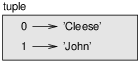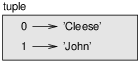

Figure 12.1: State diagram.
But in a larger diagram you might want to leave out the details. For example, a diagram of the telephone directory might appear as in Figure 12.2.


Figure 12.2: State diagram.

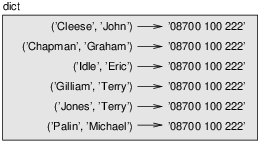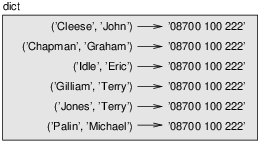

Here the tuples are shown using Python syntax as a graphical shorthand. The telephone number in the diagram is the complaints line for the BBC, so please don’t call it.

    12.7  Sequences of sequences

I have focused on lists of tuples, but almost all of the examples in this chapter also work with lists of lists, tuples of tuples, and tuples of lists. To avoid enumerating the possible combinations, it is sometimes easier to talk about sequences of sequences.

In many contexts, the different kinds of sequences (strings, lists and tuples) can be used interchangeably. So how should you choose one over the others?

To start with the obvious, strings are more limited than other sequences because the elements have to be characters. They are also immutable. If you need the ability to change the characters in a string (as opposed to creating a new string), you might want to use a list of characters instead.

Lists are more common than tuples, mostly because they are mutable. But there are a few cases where you might prefer tuples:

In some contexts, like a return statement, it is syntactically simpler to create a tuple than a list.
If you want to use a sequence as a dictionary key, you have to use an immutable type like a tuple or string.
If you are passing a sequence as an argument to a function, using tuples reduces the potential for unexpected behavior due to aliasing.
Because tuples are immutable, they don’t provide methods like sort and reverse, which modify existing lists. But Python provides the built-in function sorted, which takes any sequence and returns a new list with the same elements in sorted order, and reversed, which takes a sequence and returns an iterator that traverses the list in reverse order.

12.8  Debugging

Lists, dictionaries and tuples are examples of data structures; in this chapter we are starting to see compound data structures, like lists of tuples, or dictionaries that contain tuples as keys and lists as values. Compound data structures are useful, but they are prone to what I call shape errors; that is, errors caused when a data structure has the wrong type, size, or structure. For example, if you are expecting a list with one integer and I give you a plain old integer (not in a list), it won’t work.

To help debug these kinds of errors, I have written a module called structshape that provides a function, also called structshape, that takes any kind of data structure as an argument and returns a string that summarizes its shape. You can download it from http://thinkpython2.com/code/structshape.py

Here’s the result for a simple list:

In [ ]:
from structshape import structshape
t = [1, 2, 3]
structshape(t)

A fancier program might write “list of 3 ints”, but it was easier not to deal with plurals. Here’s a list of lists:

In [ ]:
t2 = [[1,2], [3,4], [5,6]]
structshape(t2)

'list of 3 list of 2 int'
If the elements of the list are not the same type, structshape groups them, in order, by type:

In [ ]:
t3 = [1, 2, 3, 4.0, '5', '6', [7], [8], 9]
structshape(t3)

'list of (3 int, float, 2 str, 2 list of int, int)'
Here’s a list of tuples:

In [ ]:
s = 'abc'
print(t)
lt = list(zip(t, s))
structshape(lt)

In [ ]:
print(lt)

'list of 3 tuple of (int, str)'
And here’s a dictionary with 3 items that map integers to strings.

In [ ]:
d = dict(lt) 
structshape(d)

In [ ]:
print(d)

'dict of 3 int->str'
If you are having trouble keeping track of your data structures, structshape can help.

12.9  Glossary
tuple:
An immutable sequence of elements.
tuple assignment:
An assignment with a sequence on the right side and a tuple of variables on the left. The right side is evaluated and then its elements are assigned to the variables on the left.
gather:
An operation that collects multiple arguments into a tuple.
scatter:
An operation that makes a sequence behave like multiple arguments.
zip object:
The result of calling a built-in function zip; an object that iterates through a sequence of tuples.
iterator:
An object that can iterate through a sequence, but which does not provide list operators and methods.
data structure:
A collection of related values, often organized in lists, dictionaries, tuples, etc.
shape error:
An error caused because a value has the wrong shape; that is, the wrong type or size.
12.10  Exercises
Exercise 1  
Write a function called most_frequent that takes a string and prints the letters in decreasing order of frequency. Find text samples from several different languages and see how letter frequency varies between languages. Compare your results with the tables at http://en.wikipedia.org/wiki/Letter_frequencies. Solution: http://thinkpython2.com/code/most_frequent.py.

Exercise 2  
More anagrams!

Write a program that reads a word list from a file (see Section 9.1) and prints all the sets of words that are anagrams.
Here is an example of what the output might look like:

['deltas', 'desalt', 'lasted', 'salted', 'slated', 'staled']
['retainers', 'ternaries']
['generating', 'greatening']
['resmelts', 'smelters', 'termless']
Hint: you might want to build a dictionary that maps from a collection of letters to a list of words that can be spelled with those letters. The question is, how can you represent the collection of letters in a way that can be used as a key?

Modify the previous program so that it prints the longest list of anagrams first, followed by the second longest, and so on.
In Scrabble a “bingo” is when you play all seven tiles in your rack, along with a letter on the board, to form an eight-letter word. What collection of 8 letters forms the most possible bingos?
Solution: http://thinkpython2.com/code/anagram_sets.py.

Exercise 3  
Two words form a “metathesis pair” if you can transform one into the other by swapping two letters; for example, “converse” and “conserve”. Write a program that finds all of the metathesis pairs in the dictionary. Hint: don’t test all pairs of words, and don’t test all possible swaps. Solution: http://thinkpython2.com/code/metathesis.py. Credit: This exercise is inspired by an example at http://puzzlers.org.

Exercise 4  
Here’s another Car Talk Puzzler (http://www.cartalk.com/content/puzzlers):

What is the longest English word, that remains a valid English word, as you remove its letters one at a time?
Now, letters can be removed from either end, or the middle, but you can’t rearrange any of the letters. Every time you drop a letter, you wind up with another English word. If you do that, you’re eventually going to wind up with one letter and that too is going to be an English word—one that’s found in the dictionary. I want to know what’s the longest word and how many letters does it have?

I’m going to give you a little modest example: Sprite. Ok? You start off with sprite, you take a letter off, one from the interior of the word, take the r away, and we’re left with the word spite, then we take the e off the end, we’re left with spit, we take the s off, we’re left with pit, it, and I.


Write a program to find all words that can be reduced in this way, and then find the longest one.

This exercise is a little more challenging than most, so here are some suggestions:

You might want to write a function that takes a word and computes a list of all the words that can be formed by removing one letter. These are the “children” of the word.
Recursively, a word is reducible if any of its children are reducible. As a base case, you can consider the empty string reducible.
The wordlist I provided, words.txt, doesn’t contain single letter words. So you might want to add “I”, “a”, and the empty string.
To improve the performance of your program, you might want to memoize the words that are known to be reducible.
Solution: http://thinkpython2.com/code/reducible.py.

Buy this book at Amazon.com

Contribute
If you would like to make a contribution to support my books, you can use the button below and pay with PayPal. Thank you!
Pay what you want:

Small $1.00 USD
PayPal - The safer, easier way to pay online!
Are you using one of our books in a class?
We'd like to know about it. Please consider filling out this short survey.

Think DSP



Think Java



Think Bayes



Think Python 2e



Think Stats 2e



Think Complexity